<a href="https://colab.research.google.com/github/whippyrock12-a11y/analysis_connectatel/blob/main/analysis_Connectatel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.

In [ ]:

# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [ ]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [ ]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [ ]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset

print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)


plans (2, 8)
,users (4000, 8)
,usage (40000, 6)


In [ ]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 2 entries, 0 to 1
,Data columns (total 8 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   plan_name          2 non-null      object 
, 1   messages_included  2 non-null      int64  
, 2   gb_per_month       2 non-null      int64  
, 3   minutes_included   2 non-null      int64  
, 4   usd_monthly_pay    2 non-null      int64  
, 5   usd_per_gb         2 non-null      float64
, 6   usd_per_message    2 non-null      float64
, 7   usd_per_minute     2 non-null      float64
,dtypes: float64(3), int64(4), object(1)
,memory usage: 256.0+ bytes


In [ ]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 4000 entries, 0 to 3999
,Data columns (total 8 columns):
, #   Column      Non-Null Count  Dtype 
,---  ------      --------------  ----- 
, 0   user_id     4000 non-null   int64 
, 1   first_name  4000 non-null   object
, 2   last_name   4000 non-null   object
, 3   age         4000 non-null   int64 
, 4   city        3531 non-null   object
, 5   reg_date    4000 non-null   object
, 6   plan        4000 non-null   object
, 7   churn_date  466 non-null    object
,dtypes: int64(2), object(6)
,memory usage: 250.1+ KB


In [ ]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 40000 entries, 0 to 39999
,Data columns (total 6 columns):
, #   Column    Non-Null Count  Dtype  
,---  ------    --------------  -----  
, 0   id        40000 non-null  int64  
, 1   user_id   40000 non-null  int64  
, 2   type      40000 non-null  object 
, 3   date      39950 non-null  object 
, 4   duration  17924 non-null  float64
, 5   length    22104 non-null  float64
,dtypes: float64(2), int64(2), object(2)
,memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:
# cantidad de nulos para users
print('Nulos:',users.isna().sum())
print('Proporcion:',users.isna().mean())

Nulos: user_id          0
,first_name       0
,last_name        0
,age              0
,city           469
,reg_date         0
,plan             0
,churn_date    3534
,dtype: int64
,Proporcion: user_id       0.00000
,first_name    0.00000
,last_name     0.00000
,age           0.00000
,city          0.11725
,reg_date      0.00000
,plan          0.00000
,churn_date    0.88350
,dtype: float64


In [ ]:
# cantidad de nulos para usage
print('Nulos;',usage.isna().sum())
print('Proporcion:',usage.isna().mean())

Nulos; id              0
,user_id         0
,type            0
,date           50
,duration    22076
,length      17896
,dtype: int64
,Proporcion: id          0.00000
,user_id     0.00000
,type        0.00000
,date        0.00125
,duration    0.55190
,length      0.44740
,dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).


**Diagnóstico y Acciones:**

- users.city (11.7%): Imputar como "Unknown" o investigar origen para evitar sesgos geográficos en el análisis.

- users.churn_date (88.3%): Mantener como está; los nulos son informativos e indican usuarios actualmente activos.

- usage.date (0.1%): Eliminar registros nulos por ser una cantidad insignificante que no afecta la muestra.

- usage.duration (55.2%): Validar contra la columna type; si son SMS, imputar con 0 para permitir cálculos matemáticos.

- usage.length (44.7%): Validar contra la columna type; si son llamadas/SMS, imputar con 0 ya que no generan tráfico de datos.

* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos.

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.


**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.



El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [ ]:
# explorar columnas numéricas de users
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id`:
  - No tiene valores faltantes
- La columna `age`:
    - No tiene valores faltantes
    - La edad promedio es de 33.7 años
    - La desviación estandar es muy alta
    - Tiene edades no validas

In [ ]:
# explorar columnas numéricas de usage
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id`:
    - No tienen valores faltantes
    - No tienen valores que no sean validos
- Las columnas `duration`y `length`:
    - Tienen valores faltantes
    -  En promedio `duration` tiene un bajo promedio en min/llamada
    -  `duration` tiene una llamada maxima de 120 min, error o real?
    -  `length` es en promedio un buen tamaño de msj de texto
    -  `length` tiene un maximo de 1,490 caracteres, mensaje muy largo o posible spam

In [ ]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
for col in columnas_user:
    print(f"Distribución de {col}:")
    print(users[col].value_counts())

Distribución de city:
,Bogotá      808
,CDMX        730
,Medellín    616
,GDL         450
,Cali        424
,MTY         407
,?            96
,Name: city, dtype: int64
,Distribución de plan:
,Basico     2595
,Premium    1405
,Name: plan, dtype: int64


La columna city:
- Bogotá es la ciudad más importante
- Tenemos 96 clientes con valores faltantes o mal registrados
- La columna plan:
- Básico: 2,595 clientes (64.9%)
- Premium: 1,405 clientes (35.1%)

In [ ]:
# explorar columna categórica de usage
usage['type'].value_counts()

text    22092
call    17908
Name: type, dtype: int64

- La columna `type`:
    - La mayoria de los usuarios prefieren texto que llamadas.

✍️ Comentario: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso.

Valores inválidos o sentinels

¿En qué columnas encontraste valores inválidos o sentinels? age, length y city
¿Qué acción tomarías?
Age: Se debe filtrar o imputar estos valores negativos antes de cualquier análisis demográfico.
Length: Filtrar los outliers en si se considera que ensucian el promedio de uso real.
City: Estandarizar la columna,reemplazando los "?" por "Unknown".

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [ ]:

# Convertir a fecha las columnas a tipo fecha
def convertir_fechas():
    for df in [plans,users,usage]: #definimos los 3 df para que el for busque los 3
         for col in df.columns:
            if 'date' in col.lower() or 'fecha' in col.lower(): #buscamos en solo las columnas que tengan como nombre 'date' o 'fecha'
                df[col] = pd.to_datetime(df[col], errors='coerce') #convertimos a fecha y hacemos a prueba de errores

convertir_fechas()
plans.info()
users.info()
usage.info()


<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 2 entries, 0 to 1
,Data columns (total 8 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   plan_name          2 non-null      object 
, 1   messages_included  2 non-null      int64  
, 2   gb_per_month       2 non-null      int64  
, 3   minutes_included   2 non-null      int64  
, 4   usd_monthly_pay    2 non-null      int64  
, 5   usd_per_gb         2 non-null      float64
, 6   usd_per_message    2 non-null      float64
, 7   usd_per_minute     2 non-null      float64
,dtypes: float64(3), int64(4), object(1)
,memory usage: 256.0+ bytes
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 4000 entries, 0 to 3999
,Data columns (total 8 columns):
, #   Column      Non-Null Count  Dtype         
,---  ------      --------------  -----         
, 0   user_id     4000 non-null   int64         
, 1   first_name  4000 non-null   object        
, 2   last_name   4000 non-null   

In [ ]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts()

2024    1330
2023    1316
2022    1314
2026      40
Name: reg_date, dtype: int64

En `reg_date`, hay 40 registros con año '2026'

In [ ]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts()

2024.0    39950
Name: date, dtype: int64

En `date`, solo tenemos fechas de '2024' pero debido a los 50 datos faltantes nos muestra '2024.0'
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?
    - Diagnóstico: Errores de entrada de datos o problemas de zona horaria.
    - Acción: Investigar si son pocos casos y convertir a NaN.

---
## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'].median() # calculamos mediana
users['age'] = users['age'].replace(-999, age_mediana)
# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [ ]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', np.nan)

# Verificar cambios
print("Cantidad de nulos en 'city' tras el reemplazo:", users['city'].isna().sum())

users['city'].value_counts()

Cantidad de nulos en 'city' tras el reemplazo: 565


Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [ ]:

# Marcar fechas futuras como NA para reg_date
fecha_limite = pd.to_datetime('2024-12-31')
users['reg_date'] = users['reg_date'].mask(users['reg_date'] > fecha_limite, np.nan)

# Verificar cambios
print("Fechas futuras encontradas y convertidas:", users['reg_date'].isna().sum())
print("\nResumen de la columna reg_date:")
print(users['reg_date'].describe(datetime_is_numeric=True))


Fechas futuras encontradas y convertidas: 40
,
,Resumen de la columna reg_date:
,count                             3960
,mean     2023-07-03 21:39:41.095273728
,min                2022-01-01 00:00:00
,25%      2022-10-02 20:17:11.657914368
,50%      2023-07-04 10:00:05.401350400
,75%      2024-04-03 04:00:05.401350400
,max                2024-12-31 00:00:00
,Name: reg_date, dtype: object


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.
- Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration
usage["duration"].isna().groupby(usage["type"]).mean()

type
call    0.000000
text    0.999276
Name: duration, dtype: float64

In [ ]:
# Verificación MAR en usage (Missing At Random) para length
usage["length"].isna().groupby(usage["type"]).mean()

type
call    0.99933
text    0.00000
Name: length, dtype: float64

Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`:

SÍ son MAR porque los nulos dependen completamente de la columna type:
- El tipo de comunicación determina qué métrica es relevante
- No es casualidad que falten estos datos ya que es natural que las llamadas no tengan length y los textos no tengan duration

---
## 🧩Paso 4: Summary statistics de uso por usuario

### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [ ]:
# Columnas auxiliares:
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes, 1 si es el tipo que buscamos y 0 si no
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas, 1 si es el tipo que buscamos y 0 si no

# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'is_text': 'sum',    # Sumar los 1s de mensajes
    'is_call': 'sum',    # Sumar los 1s de llamadas
    'duration': 'sum'       # Sumar los minutos totales
}).reset_index()

In [ ]:
# Después de la agregación, renombramos columnas:
usage_agg.columns = ['user_id', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on='user_id', how='left')  # Unir con la tabla users

# En caso de NaN, reemplazarlos por 0
columnas_uso = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
user_profile[columnas_uso] = user_profile[columnas_uso].fillna(0)

# Verificar que se creó correctamente
print("✅ user_profile creado exitosamente!")
print(f"Shape: {user_profile.shape}") # ver columnas y filas del merge
print(f"Columnas: {user_profile.columns.tolist()}") #imprimir las columnas de user_profile

user_profile.head(5)

✅ user_profile creado exitosamente!
,Shape: (4000, 11)
,Columnas: ['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaT,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaT,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaT,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaT,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaT,4.0,3.0,8.01


### 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [ ]:
# Resumen estadístico de las columnas numéricas
print("=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS ===")
print(user_profile.describe())

print("=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS ===\n")

# Análisis de la variable 'plan'
print("1. DISTRIBUCIÓN DE PLANES:")
print("Frecuencias absolutas:")
print(user_profile['plan'].value_counts())
# Distribución porcentual del tipo de plan
print("\nFrecuencias relativas (%):")
print(user_profile['plan'].value_counts(normalize=True) * 100)

=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS ===
,            user_id          age  cant_mensajes  cant_llamadas  \
,count   4000.000000  4000.000000    4000.000000    4000.000000   
,mean   11999.500000    48.122250       5.523000       4.477000   
,std     1154.844867    17.690408       2.359738       2.145139   
,min    10000.000000    18.000000       0.000000       0.000000   
,25%    10999.750000    33.000000       4.000000       3.000000   
,50%    11999.500000    47.000000       5.000000       4.000000   
,75%    12999.250000    63.000000       7.000000       6.000000   
,max    13999.000000    79.000000      17.000000      15.000000   
,
,       cant_minutos_llamada  
,count           4000.000000  
,mean              23.311225  
,std               18.169564  
,min                0.000000  
,25%               11.107500  
,50%               19.780000  
,75%               31.412500  
,max              155.690000  
,=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS ===
,

---
## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma, escribe un insight respecto al plan y la variable, por ejemplo:

"Dentro del plan Premium, hay mayor proporción de..."
"Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes." o "No existe algún patrón."
¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

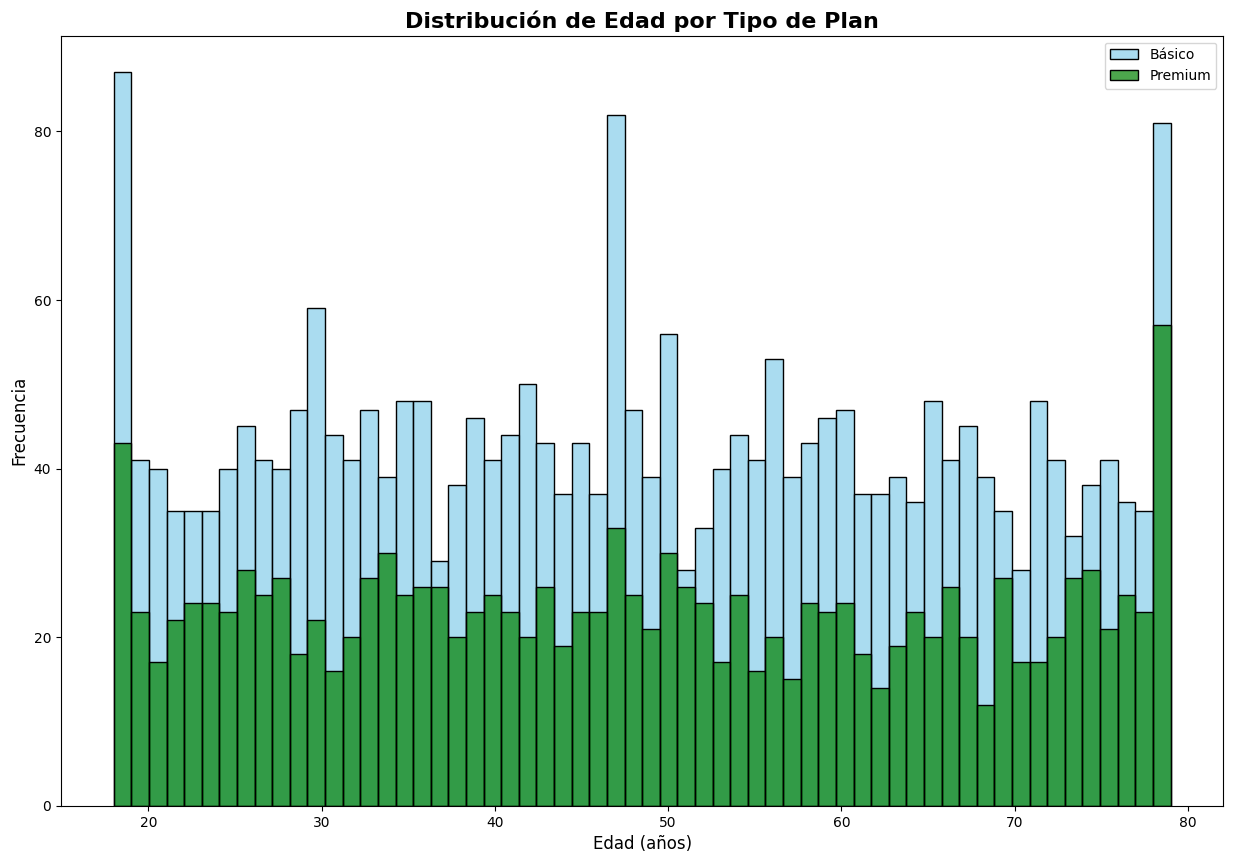

In [ ]:

# Histograma de edad
plt.figure(figsize=(15, 10))

# Crear el histograma sin hue por mejor entendimiento
sns.histplot(data=user_profile[user_profile['plan'] == 'Basico'], #clasificamos manualmente
             x='age',
             color='skyblue',
             alpha=0.7,
             label='Básico',
             bins=60)  # Raiz cuadrada de tamaño del df = Raiz de 40000 = 60

sns.histplot(data=user_profile[user_profile['plan'] == 'Premium'], #clasificamos manualmente
             x='age',
             color='green',
             alpha=0.7,
             label='Premium',
             bins=60)  # Raiz cuadrada de tamaño del df = Raiz de 40000 = 60

plt.title('Distribución de Edad por Tipo de Plan', fontsize=16, fontweight='bold') #ajustamos tamaño y tipo letra (negrita)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.show()


💡Insights:
- Distribución Uniforme (también puede considerarse Simétrica en sentido amplio, ya que no tiene un sesgo marcado hacia un extremo).
- Los usuarios del plan Básico y Premium comparten un perfil demográfico casi idéntico en cuanto a edad, lo que indica que el factor de decisión para contratar el plan Premium podría depender más de la capacidad adquisitiva o la necesidad técnica (más minutos/datos) que de un perfil de edad específico.
- El plan Básico es el preferido por casi 2 de cada 3 usuarios, sin que la edad influya en esta decisión.

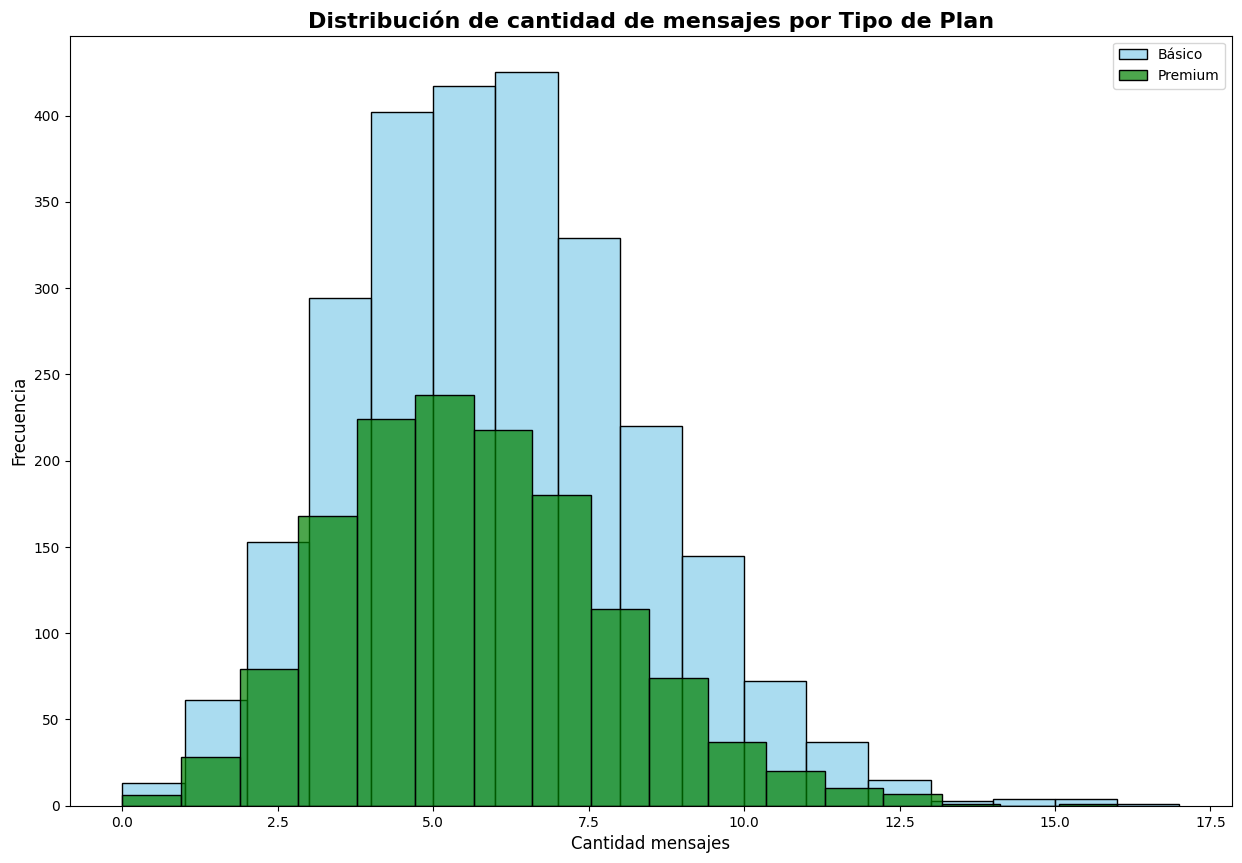

In [ ]:
# Histograma para visualizar la cant_mensajes
plt.figure(figsize=(15, 10))

# Crear el histograma sin hue por mejor entendimiento
sns.histplot(data=user_profile[user_profile['plan'] == 'Basico'], #clasificamos manualmente
             x='cant_mensajes',
             color='skyblue',
             alpha=0.7,   #transparencia para mejor visualización
             label='Básico',
             bins=17)  # Dejamos bins en 17 por mejor ajuste

sns.histplot(data=user_profile[user_profile['plan'] == 'Premium'], #clasificamos manualmente
             x='cant_mensajes',
             color='green',
             alpha=0.7, #transparencia para mejor visualización
             label='Premium',
             bins=17)  # Dejamos bins en 17 por mejor ajuste

plt.title('Distribución de cantidad de mensajes por Tipo de Plan', fontsize=16, fontweight='bold') #ajustamos tamaño y tipo letra (negrita)
plt.xlabel('Cantidad mensajes', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.show()

💡Insights:
- Distribución: La variable cantidad de mensajes tiene una distribución sesgada a la derecha (positiva). El pico de la frecuencia se encuentra en valores bajos/medios, y la "cola" de la distribución se extiende hacia la derecha, indicando que hay unos pocos usuarios que envían una cantidad significativamente mayor de mensajes.
- El perfil del cliente es demográficamente plano (edad uniforme), pero su comportamiento de uso es asimétrico: la mayoría consume moderadamente (sesgo a la derecha en mensajes).
- El plan Básico es el preferido por casi 2 de cada 3 usuarios, sin que la edad influya en esta decisión.

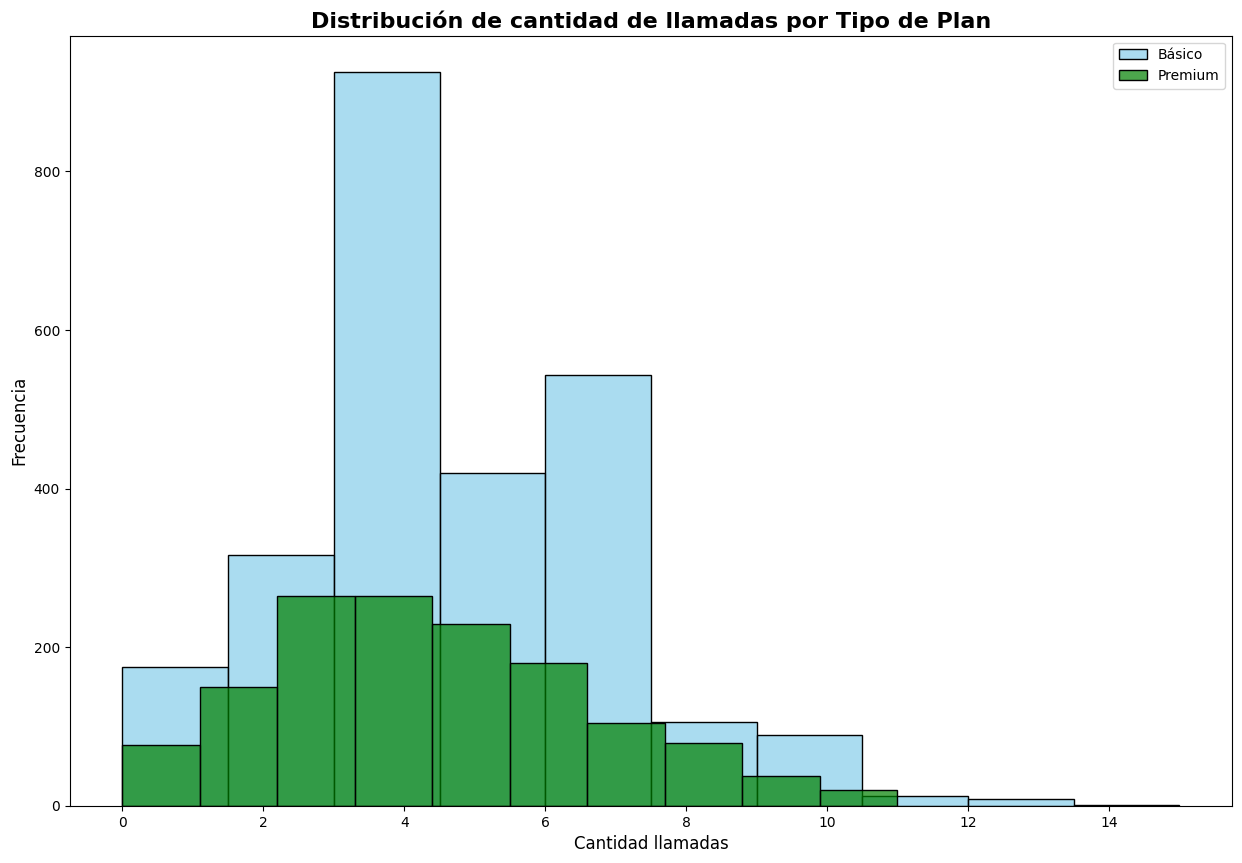

In [ ]:
# Histograma para visualizar la cant_llamadas
plt.figure(figsize=(15, 10))

# Crear el histograma sin hue por mejor entendimiento
sns.histplot(data=user_profile[user_profile['plan'] == 'Basico'], #clasificamos manualmente
             x='cant_llamadas',
             color='skyblue',
             alpha=0.7,   #transparencia para mejor visualización
             label='Básico',
             bins=10)  # Dejamos bins en 10 por mejor ajuste

sns.histplot(data=user_profile[user_profile['plan'] == 'Premium'], #clasificamos manualmente
             x='cant_llamadas',
             color='green',
             alpha=0.7,   #transparencia para mejor visualización
             label='Premium',
             bins=10)  # Dejamos bins en 10 por mejor ajuste

plt.title('Distribución de cantidad de llamadas por Tipo de Plan', fontsize=16, fontweight='bold') #ajustamos tamaño y tipo letra (negrita)
plt.xlabel('Cantidad llamadas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.show()

💡Insights:
- Tipo de Distribución: Es sesgada a la derecha. Al igual que con los mensajes, la frecuencia disminuye drásticamente a medida que aumenta el número de llamadas, dejando una cola larga hacia los valores más altos.
- Los usuarios del plan Básico tienden a realizar entre 3 y 4 llamadas, mientras que los de Premium muestran un comportamiento más disperso pero con un pico similar.

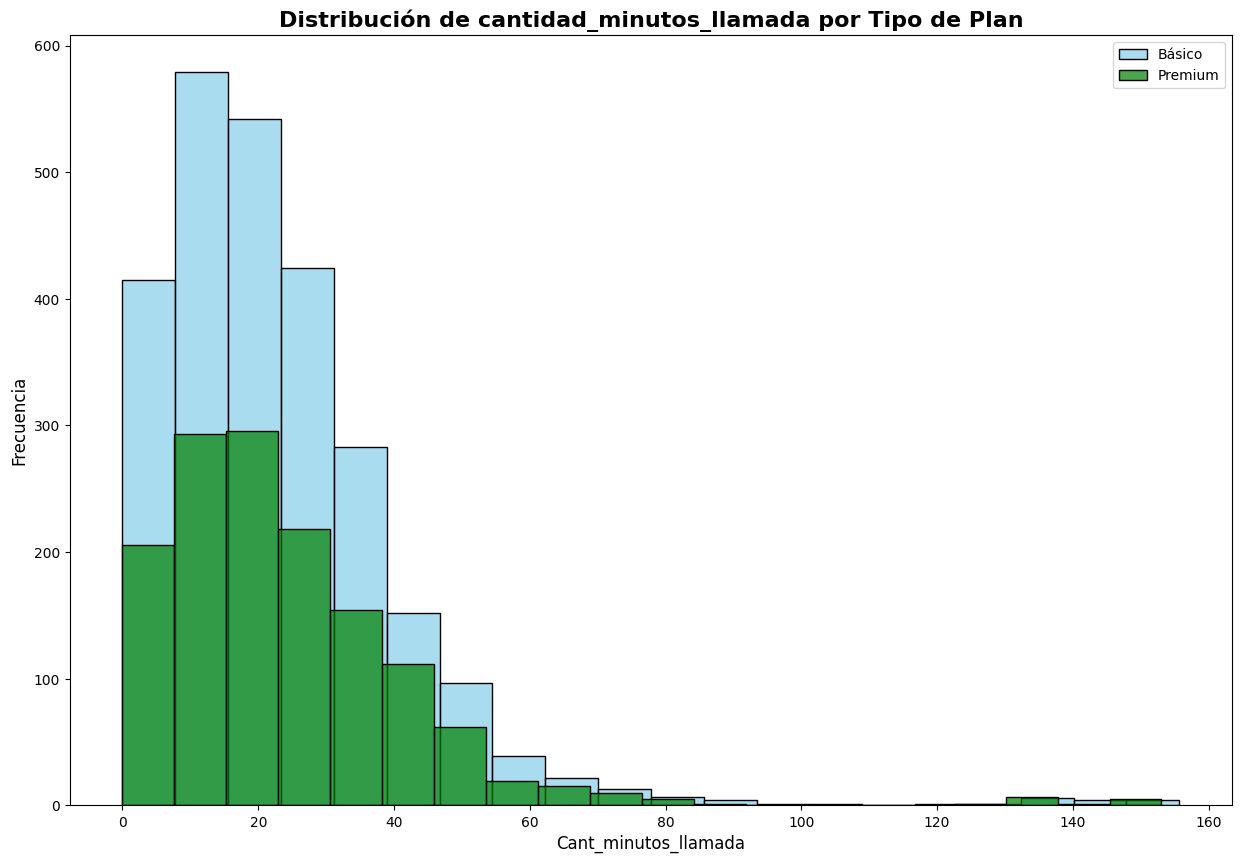

In [ ]:
# Histograma para visualizar la cant_minutos_llamada
plt.figure(figsize=(15, 10))

# Crear el histograma sin hue por mejor entendimiento
sns.histplot(data=user_profile[user_profile['plan'] == 'Basico'], #clasificamos manualmente
             x='cant_minutos_llamada',
             color='skyblue',
             alpha=0.7,   #transparencia para mejor visualización
             label='Básico',
             bins=20)  # Dejamos bins en 10 por mejor ajuste

sns.histplot(data=user_profile[user_profile['plan'] == 'Premium'], #clasificamos manualmente
             x='cant_minutos_llamada',
             color='green',
             alpha=0.7,   #transparencia para mejor visualización
             label='Premium',
             bins=20)  # Dejamos bins en 10 por mejor ajuste

plt.title('Distribución de cantidad_minutos_llamada por Tipo de Plan', fontsize=16, fontweight='bold') #ajustamos tamaño y tipo letra (negrita)
plt.xlabel('Cant_minutos_llamada', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.show()

💡Insights:
- Independientemente del plan, la gran mayoría de los usuarios consume menos de 30 minutos totales de llamada.
- Comportamiento: Existe una concentración masiva en el primer intervalo (0-30 min), lo que refuerza el hallazgo de que los usuarios prefieren el texto sobre las llamadas.
- No se observa que los usuarios Premium hablen significativamente más tiempo que los Básicos.
- Tipo de Distribución: Es fuertemente sesgada a la derecha. La frecuencia cae drásticamente después de los 30 minutos, dejando una cola muy larga hacia los 160 minutos. Lo que nos indica que pocos usuarios suelen tener llamadas extensas.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

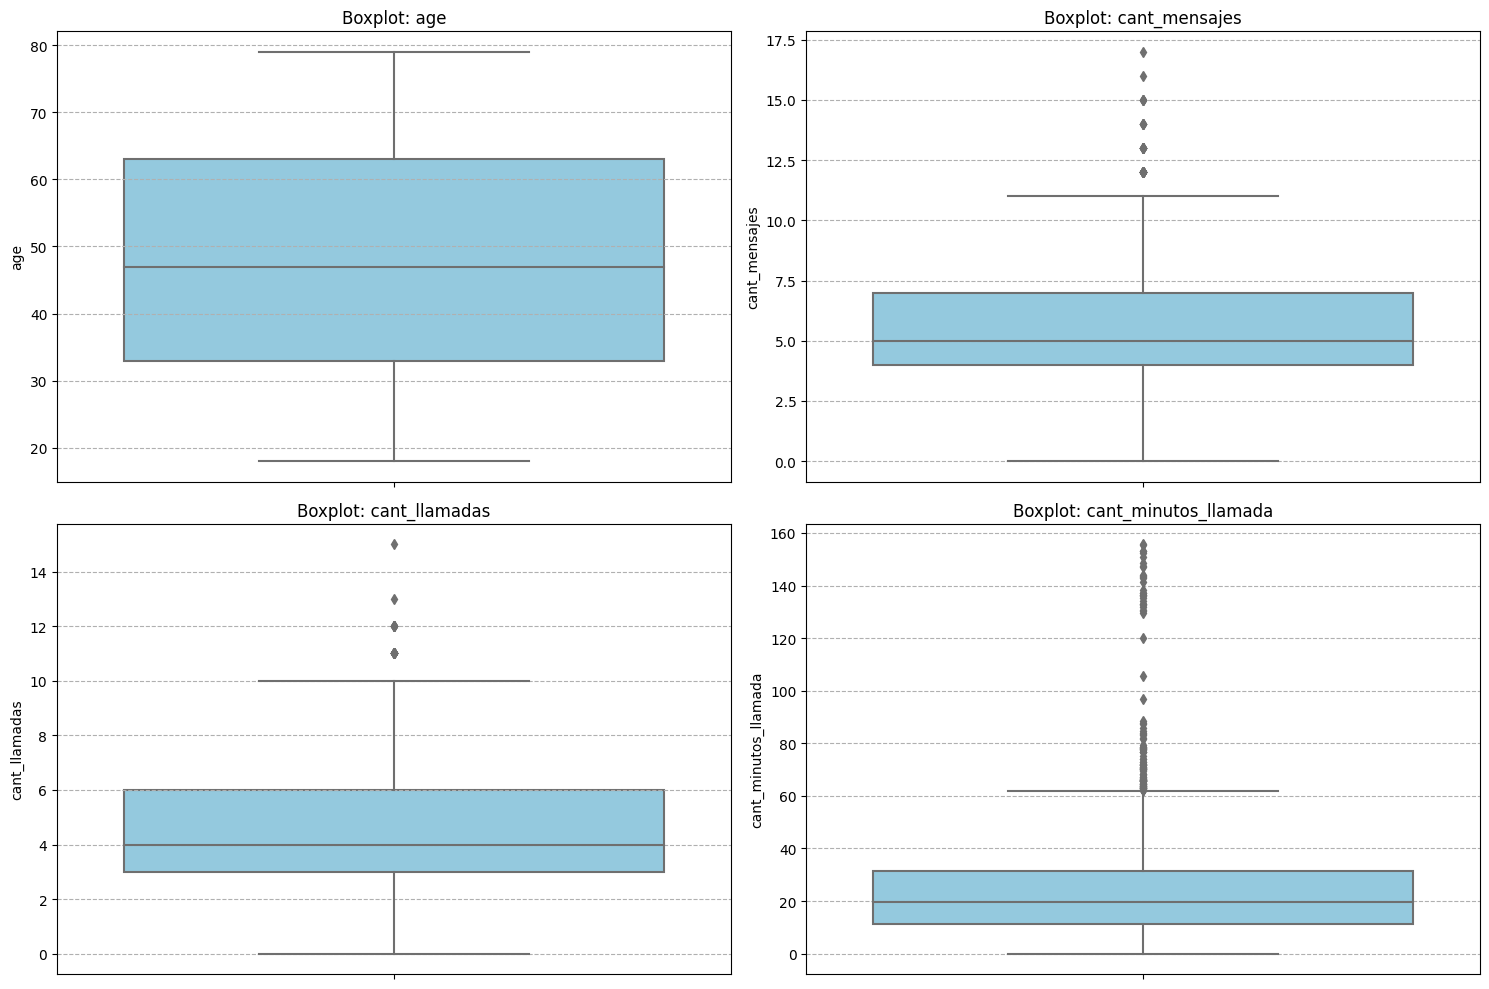

In [ ]:
# Visualizando usando BoxPlot
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada'] # columnas a analizar

# Bucle para generar gráficos
plt.figure(figsize=(15, 10))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=user_profile[col], color='skyblue') #usamos 'y' para ubicar  los boxplot en vertical
    plt.title(f'Boxplot: {col}')
    plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

💡Insights:
- Age: no outliers
- cant_mensajes: outliers
- cant_llamadas: outliers
- cant_minutos_llamada: outliers

In [ ]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
print("--- ANÁLISIS DE LÍMITES SUPERIORES (MÉTODO IQR) ---")

for col in columnas_limites:
    # 1. Calculamos los cuartiles Q1 (25%) y Q3 (75%)
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)

    # 2. Calculamos el Rango Intercuartílico (IQR)
    IQR = Q3 - Q1 # formula

    # 3. Calculamos solo el Límite Superior (LS)
    # Ya que el consumo no puede ser negativo, no tiene sentido el límite inferior aquí
    limite_superior = Q3 + 1.5 * IQR

    print(f"\nVariable: {col}") #Para mostrar la columna_limite
    print(f"  > Q1: {Q1} | Q3: {Q3} | IQR: {IQR}")
    print(f"  > Límite Superior Sugerido: {limite_superior}")

    # Verificamos cuántos registros superan este límite
    outliers = user_profile[user_profile[col] > limite_superior]
    print(f"  > Se detectaron {len(outliers)} usuarios por encima del límite.")

--- ANÁLISIS DE LÍMITES SUPERIORES (MÉTODO IQR) ---
,
,Variable: cant_mensajes
,  > Q1: 4.0 | Q3: 7.0 | IQR: 3.0
,  > Límite Superior Sugerido: 11.5
,  > Se detectaron 46 usuarios por encima del límite.
,
,Variable: cant_llamadas
,  > Q1: 3.0 | Q3: 6.0 | IQR: 3.0
,  > Límite Superior Sugerido: 10.5
,  > Se detectaron 30 usuarios por encima del límite.
,
,Variable: cant_minutos_llamada
,  > Q1: 11.1075 | Q3: 31.4125 | IQR: 20.305
,  > Límite Superior Sugerido: 61.870000000000005
,  > Se detectaron 109 usuarios por encima del límite.


In [ ]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,4000.000000,4000.000000
mean,5.523000,4.477000,23.311225
std,2.359738,2.145139,18.169564
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.107500
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.412500
max,17.000000,15.000000,155.690000


💡Insights:
- cant_mensajes: El límite superior es 11.5, pero el valor máximo detectado es apenas 17.0.
Por qué mantener?: La diferencia entre el límite y el máximo es muy pequeña (solo 5.5 mensajes de diferencia). Estos 46 usuarios representan un consumo humano perfectamente normal y creíble. No son errores técnicos ni ruido, simplemente son usuarios ligeramente más activos que el promedio.

- cant_llamadas: El límite es 10.5 y el máximo es 15.0.
Por qué mantener?: Al igual que con los mensajes, tener un máximo de 15 llamadas es un comportamiento totalmente realista para un cliente de telefonía. Solo hay 30 usuarios en esta categoría, lo que indica que no están distorsionando la media de forma significativa. Eliminarlos sería perder datos reales de clientes valiosos.


- cant_minutos_llamada: Aquí el salto es mayor. El límite es 61.87, pero el valor máximo llega hasta 155.69 minutos.
Mantener?: Hay 109 usuarios que superan el límite, y el máximo es 2.5 veces mayor que el límite sugerido.
 -Decisión: Si el objetivo fuese analizar el comportamiento del "usuario promedio", estos 109 casos podrían sesgar mis resultados. Sin embargo, en  telecomunicaciones, estos serian mis heavy "Heavy Users".

Recomendación: No borrar, pero marcarlos. Son usuarios que consumen mucho más tiempo y probablemente son los que más ingresos generan por cargos adicionales o los que más necesitan el plan Premium.

---
## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:

# Crear columna grupo_uso
# creamos función para segmentar usuarios
def segmentar_usuario_uso(row):
    # Extraemos los valores de la fila
    llamadas = row['cant_llamadas']
    mensajes = row['cant_mensajes']

    # Aplicamos la lógica de la más restrictiva a la general
    if llamadas < 5 and mensajes < 5:
        return 'Bajo uso'
    elif llamadas < 10 and mensajes < 10:
        return 'Uso medio'
    else:
        return 'Alto uso'

# Aplicamos la función fila por fila (axis=1)
user_profile['grupo_uso'] = user_profile.apply(segmentar_usuario_uso, axis=1) #aplicar función fila por fila


In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaT,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaT,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaT,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaT,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaT,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:
# Crear columna grupo_edad
# creamos función para segmentar usuarios
def segmentar_usuario_edad(row):
    # Extraemos los valores de la fila
    edad = row['age']

    # Aplicamos la lógica de la más restrictiva a la general
    if edad < 30:
        return 'Joven'
    elif edad < 60:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

# Aplicamos la función fila por fila (axis=1)
user_profile['grupo_edad'] = user_profile.apply(segmentar_usuario_edad, axis=1) #aplicar función fila por fila

In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaT,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaT,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaT,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaT,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaT,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

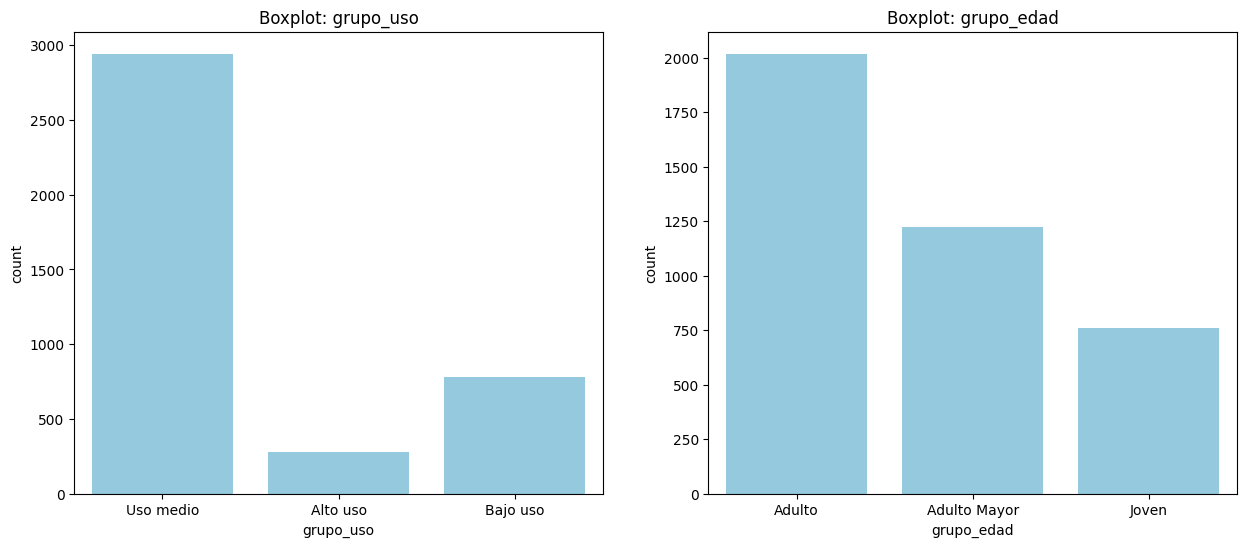

In [ ]:
# Visualización de los segmentos por uso y edad
columnas_categoricas_plot= ['grupo_uso','grupo_edad'] # columnas a analizar

# Bucle para generar gráficos
plt.figure(figsize=(15, 6)) #tamaño
for i, col in enumerate(columnas_categoricas_plot, 1): #lista para acomodar plots
    plt.subplot(1, 2, i) #1 filas, 2 columnas
    sns.countplot(x=user_profile[col], color='skyblue') #usamos 'x' para ubicar  los plot en horizontal
    plt.title(f'Boxplot: {col}')

plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:**
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

Contexto del Proyecto: Se analizó el comportamiento de 4,000 usuarios de ConnectaTel hasta 2024. El objetivo fue identificar perfiles de consumo y detectar anomalías para optimizar la estrategia comercial.

**1. Diagnóstico de Calidad y Comportamiento Atípico:**
- Limpieza Crítica: Se detectaron y trataron valores inconsistentes como edades negativas (-999) y registros de ciudad faltantes.

- Patrones de Uso: El análisis de outliers mediante el método IQR reveló que la gran mayoría de los usuarios mantiene un consumo moderado y realista (promedio de 5.2 minutos por llamada y 5.5 mensajes).

- Fuga de Datos (Churn): Solo un 11.6% de la base de datos presenta una fecha de cancelación (churn_date), lo que indica una retención saludable del 88.4% de los clientes activos.

**2. Segmentación y Oportunidades de Negocio:**
- Tras clasificar a los usuarios en grupos de uso (Bajo, Medio y Alto), se identificaron los siguientes hallazgos estratégicos:

- Dominio del Plan Básico: El 64.9% de los usuarios prefiere el plan Básico. Sin embargo, detectamos 109 "Heavy Users" que superan los 61.8 minutos de llamada mensuales y 46 usuarios que exceden el límite normal de mensajes.

- Oportunidad de Upselling: Existe un segmento importante de usuarios en el plan Básico que, por su nivel de consumo ("Alto uso"), podrían beneficiarse de una migración al plan Premium. Esto aumentaría el ingreso promedio por usuario (ARPU) y mejoraría su experiencia al evitar cargos por excedentes.

**3. Conclusiones y Recomendaciones**
Campaña de Migración: Dirigir promociones del plan Premium específicamente a los segmentos de "Alto uso".

- Monitoreo de "Heavy Users": Los usuarios con mensajes extremadamente largos (hasta 1,490 caracteres) deben ser monitoreados para descartar uso de spam o cuentas corporativas bajo planes personales.

- Expansión Geográfica: Bogotá y CDMX concentran la mayor cantidad de clientes. Se recomienda replicar las estrategias de captación de estas ciudades en Monterrey y Cali para equilibrar la cuota de mercado.


**⚠️ Problemas detectados en los datos**

Outliers en Edad: Se identificaron registros con edades imposibles (valor de -999), lo que indica errores en la captura de datos en el sistema de registro de clientes.

Asimetría en Consumo: Las variables de mensajes y minutos presentan un sesgo marcado a la derecha. Existe un pequeño grupo de "Heavy Users" que consume hasta 155 minutos mensuales, superando por mucho el promedio de 23 minutos.

**🔍 Segmentos por Edad**

Distribución Uniforme: No existe un patrón generacional para la elección de planes; la edad se distribuye de manera plana entre los 18 y 80 años tanto en el plan Básico como en el Premium.

Perfil Digital: A pesar de la amplitud de edad, el canal preferido de comunicación es el mensaje de texto (22,092 registros) frente a las llamadas (17,908 registros), lo que sugiere una base de usuarios altamente digitalizada independientemente de su edad.

**📊 Segmentos por Nivel de Uso**

Predominio de Uso Moderado: La mayoría de los clientes se clasifican en "Bajo uso" y "Uso medio", lo que valida que el plan Básico sea el más popular (64.9% de la base).

Fidelidad del Segmento Alto: Los usuarios de "Alto uso" (aquellos con más de 10 llamadas o mensajes) representan la mayor oportunidad de rentabilidad, pero también el mayor riesgo de fuga si los costos por excedentes son muy altos.

➡️ Esto sugiere que... La edad no es un factor determinante para segmentar el mercado, sino el comportamiento de consumo. El hecho de que la mayoría de los usuarios prefiera mensajes indica que los servicios de voz están pasando a un segundo plano, y que el valor real percibido por el cliente está en la conectividad y la mensajería.

**💡 Recomendaciones**

Optimización de Planes: Crear un "paquete de mensajes ilimitados" para el plan Básico, ya que es la actividad principal de los usuarios y podría aumentar la satisfacción sin saturar la red de voz.

Estrategia de Up-selling: Dirigir campañas de actualización al plan Premium exclusivamente a los 109 usuarios identificados en el segmento de "Alto uso" de minutos, ofreciéndoles un beneficio por "consumo leal" para evitar que migren a la competencia.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---